In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../DATA/moviereviews.csv')

In [4]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


**TASK: Check to see if there are any missing values in the dataframe.**

In [23]:
#CODE HERE
df.isnull().sum()

label      0
review    35
dtype: int64

label      0
review    35
dtype: int64

**Remove any reviews that are NaN**

In [25]:
df = df.dropna()

In [33]:
print(df['review'].str.isspace().sum())

27


27

In [41]:
df = df[~df['review'].str.isspace()]

In [47]:
df[df['review'].apply(lambda review: review == ' ')]


,label,review


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


**Confirm the value counts per label:**

In [48]:
#CODE HERE
df['label'].value_counts()

label
neg    969
pos    969
Name: count, dtype: int64

## EDA on Bag of Words

****

In [53]:
#CODE HERE
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words='english')

In [57]:
matrix = count_vect.fit_transform(df[df['label']=='neg']['review'])
freqs = zip(count_vect.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for Negative reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Negative reviews.
[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


In [59]:
matrix = count_vect.fit_transform(df[df['label']=='pos']['review'])
freqs = zip(count_vect.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for Positive reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Positive reviews.
[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


### Training and Data

**Split the data into features and a label (X and y) and then preform a train/test split. You may use whatever settings you like. To compare your results to the solution notebook, use `test_size=0.20, random_state=101`**

In [61]:
X = df['review']
y = df['label']

In [63]:
#CODE HERE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [65]:
#CODE HERE
pipe = Pipeline([('tfidf',TfidfVectorizer()),
                 ('svc',LinearSVC())])

In [66]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

**TASK: Create a classification report and plot a confusion matrix based on the results of your PipeLine.**

In [67]:
#CODE HERE
from sklearn.metrics import ConfusionMatrixDisplay,classification_report

In [68]:
preds = pipe.predict(X_test)

In [70]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         neg       0.81      0.86      0.83       191
         pos       0.85      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



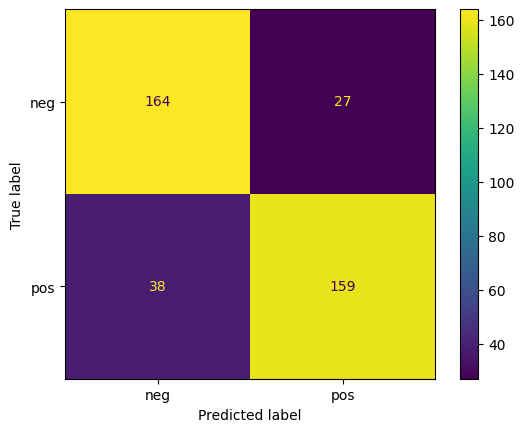

In [71]:
ConfusionMatrixDisplay.from_estimator(pipe,X_test,y_test)

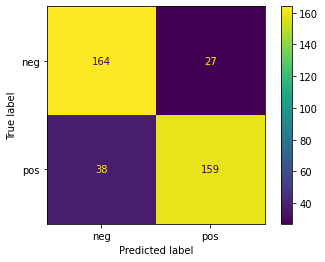

## Great job!